In [1]:
# For retrieving image information and preprocessing
from PIL import Image
# For Image display and preprocessing
import cv2
# For handling file paths
import os
# For displaying images
import matplotlib.pyplot as plt

# Collect Images

This code will run an instance in which we can collect screenshots on a button press. I will collect two images, which should display all desired information.

### Boss Damaged Image

Boss start can be gathered from the appearance of boss health bar(s). Damage to boss (and reward calculation) can be determined by observing the displayed damage values to the boss. Equipment information can be observed in the lower left corner. The desired screen grab for the AI's CNN can be found where none of this information is displayed.

### Boss Defeated Image

From here we can capture the text that is displayed when a boss is defeated.

On windows, the command to take a screenshot is "Windows Key + Print Screen". This will save screenshots to "/Pictures/screenshots/".

In [2]:
# Where the calibration images were saved
IMAGE_CALIBRATION_PATH = "../resources/EldenRing/CalibrateScreenGrabs"

In [3]:
# This fully reaches out to the necessary image for calibration
BOSS_DAMAGED_PATH = os.path.join(IMAGE_CALIBRATION_PATH,'BossDamaged.png').replace('\\', '/')
BOSS_DEFEATED_PATH = os.path.join(IMAGE_CALIBRATION_PATH,'GreatEnemyFelled.png').replace('\\', '/')
YOU_DIED_PATH = os.path.join(IMAGE_CALIBRATION_PATH,'YouDied.png').replace('\\', '/')

In [4]:
# pulls the image into the notebook
boss_damaged_image = Image.open(BOSS_DAMAGED_PATH)
boss_defeated_image = Image.open(BOSS_DEFEATED_PATH)
you_died_image = Image.open(YOU_DIED_PATH)

In [5]:
# Returns game screen dimensions
img = Image.open(BOSS_DAMAGED_PATH)
image_height = img.size[1]
image_width = img.size[0]
print('Image Height: ' + str(image_height))
print('Image Width:  ' + str(image_width))

Image Height: 1080
Image Width:  1920


Text(0.5, 1.0, 'You Died')

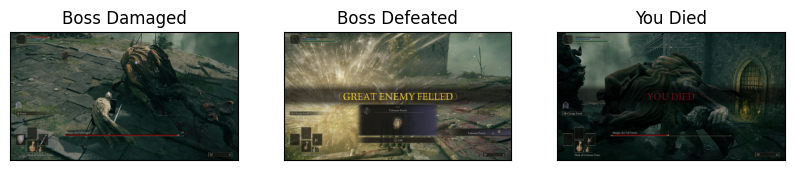

In [6]:
# Resize plot, so that it is easier to see
plt.figure(figsize=(10,19))
# Plot Boss Damaged Image in first plot
plt.subplot(1,3,1)
plt.imshow(boss_damaged_image)
plt.xticks([])
plt.yticks([])
plt.title('Boss Damaged')
# Plot Boss Defeated Image in the second plot
plt.subplot(1,3,2)
plt.imshow(boss_defeated_image)
plt.xticks([])
plt.yticks([])
plt.title('Boss Defeated')
# Plot Boss Defeated Image in the third plot
plt.subplot(1,3,3)
plt.imshow(you_died_image)
plt.xticks([])
plt.yticks([])
plt.title('You Died')

# Image Crop

Now that the images are loaded in, it is time to figure out the screen sections for each image. The list of items to grab from each screenshot is:

* The Location of Boss Health Bar(s)
* Damage to Boss
* Player Health Bar
* Each Equipment Slot
* "You Died" message
* The Location of the "Boss Defeated" Message

## Location of Boss Health Bar(s)

This AI will be trained to handle bosses that have one health bar. The appearance of the boss's health bar will signify the beginning of the fight and for the AI to start.

In [7]:
# The pixel at which the crop will occur
left = 460
upper = 867
right = 1425
lower = 878
boss_health_crop = (left, upper, right, lower)

(460, 867, 1425, 878)


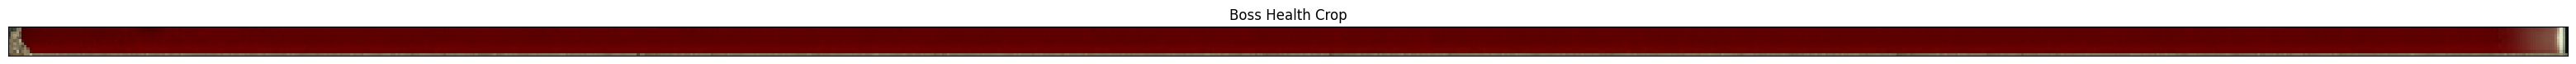

In [8]:
# The crop rectangle of the image: (left,upper,right,bottom): Starts in the upper left corner (0,0,0,0)
plt.figure(figsize=(40,10))
cropped_image = boss_damaged_image.crop(boss_health_crop)
plt.imshow(cropped_image)
plt.xticks([])
plt.yticks([])
plt.title("Boss Health Crop")
print(boss_health_crop)

## Damage to the Boss

Retrieving the value displayed here will act as a reward for the AI dealing damage to the boss and moving the fight forward. Otherwise, the AI might refuse to the fight the boss, instead acting to stay alive and not fight. This can also serve to speed up the training of the AI by providing short term goals that cause it to engage with the boss more often.

Extra room will be left on the left hand side to handle larger damage values.

In [9]:
# The pixel at which the crop will occur
left = 1400
upper = 840
right = 1470
lower = 860
boss_damage_crop = (left, upper, right, lower)

(1400, 840, 1470, 860)


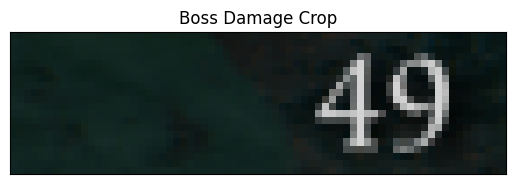

In [10]:
# The crop rectangle of the image: (left,upper,right,bottom): Starts in the upper left corner (0,0,0,0)
cropped_image = boss_damaged_image.crop(boss_damage_crop)
plt.imshow(cropped_image)
plt.xticks([])
plt.yticks([])
plt.title("Boss Damage Crop")
print(boss_damage_crop)

## Player Health Bar

By introducing penalties for getting hit by attacks, the AI will have a more immediate penalty for getting hit (The other option being player death). This also introduces the option of the AI learning to heal at opportune times, extending each learning cycle to include as much information as possible. This would reduce the number of epochs.

Extra room will be left on the right hand side for higher levels, where the player character will have more health.

In [11]:
# The pixel at which the crop will occur
left = 150
upper = 45
right = 1200
lower = 60
player_health_crop = (left, upper, right, lower)

(150, 45, 1200, 60)


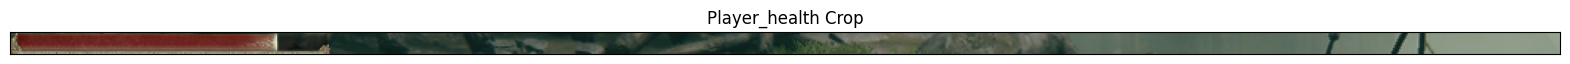

In [12]:
# The crop rectangle of the image: (left,upper,right,bottom): Starts in the upper left corner (0,0,0,0)
plt.figure(figsize=(20,2))
cropped_image = boss_damaged_image.crop(player_health_crop)
plt.imshow(cropped_image)
plt.xticks([])
plt.yticks([])
plt.title("Player_health Crop")
print(player_health_crop)

## Each Equipment Slot

This will be observed here for the purpose of including different weaponry, spells, and consumables to the AI's ability. While this will not be included in the initial AI design, the plan is to include this information at a later date so that the AI can learn to adapt to weaponry, spells, and consumable items that are given to it, beyond the base weapon given to it.

In [13]:
# The pixel at which the crop will occur
left = 238
upper = 860
right = 323
lower = 960
equipment_left_crop = (left, upper, right, lower)

In [14]:
# The pixel at which the crop will occur
left = 49
upper = 860
right = 134
lower = 960
equipment_right_crop = (left, upper, right, lower)

In [15]:
# The pixel at which the crop will occur
left = 145
upper = 805
right = 230
lower = 905
equipment_spell_crop = (left, upper, right, lower)

In [16]:
# The pixel at which the crop will occur
left = 145
upper = 915
right = 230
lower = 1015
equipment_utility_crop = (left, upper, right, lower)

left:     (238, 860, 323, 960)
right:    (49, 860, 134, 960)
spell:    (145, 805, 230, 905)
utility:  (145, 915, 230, 1015)


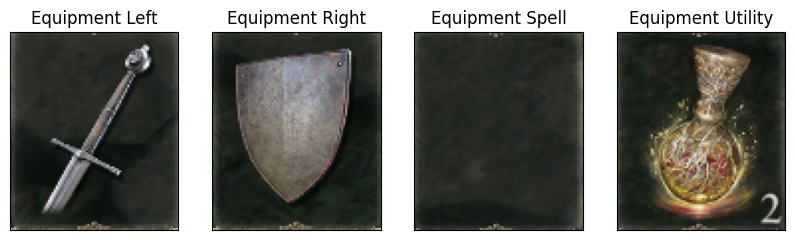

In [17]:
# Resize plot, so that it is easier to see
plt.figure(figsize=(10,19))
# Plot Boss Damaged Image in first plot
plt.subplot(1,4,1)
plt.imshow(boss_damaged_image.crop(equipment_left_crop))
plt.xticks([])
plt.yticks([])
plt.title('Equipment Left')
# Plot Boss Defeated Image in the second plot
plt.subplot(1,4,2)
plt.imshow(boss_damaged_image.crop(equipment_right_crop))
plt.xticks([])
plt.yticks([])
plt.title('Equipment Right')
# Plot Boss Defeated Image in the third plot
plt.subplot(1,4,3)
plt.imshow(boss_damaged_image.crop(equipment_spell_crop))
plt.xticks([])
plt.yticks([])
plt.title('Equipment Spell')
# Plot Boss Defeated Image in the third plot
plt.subplot(1,4,4)
plt.imshow(boss_damaged_image.crop(equipment_utility_crop)  )
plt.xticks([])
plt.yticks([])
plt.title('Equipment Utility')
# Print coordinates for each crop
print('left:     ' + str(equipment_left_crop))
print('right:    ' + str(equipment_right_crop))
print('spell:    ' + str(equipment_spell_crop))
print('utility:  ' + str(equipment_utility_crop))

## You Died

This will be used as one instance in which the fight is ended and a penalty is rewarded.

In [18]:
# The pixel at which the crop will occur
left = 750
upper = 510
right = 1170
lower = 590
you_died_crop = (left, upper, right, lower)

(150, 45, 1200, 60)


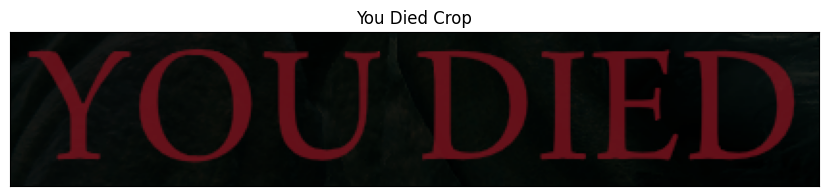

In [19]:
# The crop rectangle of the image: (left,upper,right,bottom): Starts in the upper left corner (0,0,0,0)
plt.figure(figsize=(20,2))
cropped_image = you_died_image.crop(you_died_crop)
plt.imshow(cropped_image)
plt.xticks([])
plt.yticks([])
plt.title("You Died Crop")
print(player_health_crop)

In [20]:
you_died_image.size

(1920, 1080)

# Boss Defeated Message

This is another way to signify the end of the boss fight to the AI, and would mean that the AI should be rewarded for reaching the goal set out for it.

In [21]:
# The pixel at which the crop will occur
left = 450
upper = 510
right = 1470
lower = 590
boss_defeated_crop = (left, upper, right, lower)

(150, 45, 1200, 60)


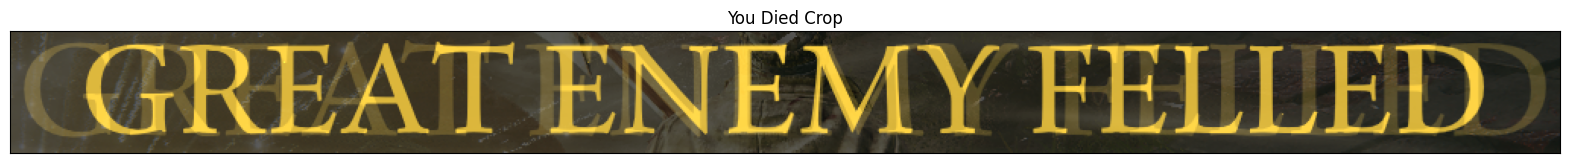

In [22]:
# The crop rectangle of the image: (left,upper,right,bottom): Starts in the upper left corner (0,0,0,0)
plt.figure(figsize=(20,2))
cropped_image = boss_defeated_image.crop(boss_defeated_crop)
plt.imshow(cropped_image)
plt.xticks([])
plt.yticks([])
plt.title("Victory Crop")
print(player_health_crop)

# Boss Detection AI

One of the most important things for the AI is receiving information, which includes seeing the boss. By looking at the boss, the AI learns what to look for from attacks and what openings it has to make an attack. By rewarding the AI for keeping the boss on the screen well enough for another AI to recognize it, the AI which is playing the game will be able to keep the boss on screen and observe it the best it can.

This process involves taking a large number of pictures and marking the boss with a bounding box, using a xml file. A few images will additionally be included that do not have the boss on the screen, to help reduce the likelihood that the AI for boss detection misattribute parts of the environment for the boss.

The reward system given from this AI will be on the current screen, not the previous states also fed into the AI. The amount of reward will be correlated with the likeliness value given to the detected boss, with a minimum value so that random objects in the environment do not contribute to this reward.

The bounding boxes were created in label-studio.

In [23]:
"""
# This will take one screenshot (1920x1080) every second and save to the resource folder
time.sleep(5)  # give time to get into the game
monitor = {'top': 0, 'left': 0, 'width': image_width, 'height': image_height}  # Define screenshot size
SCREENSHOT_DIR = "D:/Documents/ai_plays_ds/resources/EldenRing/BossImages"
# will take 500 screenshots of the desired size and save them as a .png file, with a delay between grabs
for i in range(0,500):
    time.sleep(1)  # time between screenshots; currently a one-second delay
    image_path = os.path.join(SCREENSHOT_DIR, (str(i) + ".png")).replace('\\', '/')
    img = mss.mss().grab(monitor)  # grab screenshot of indicated size
    mss.tools.to_png(img.rgb, img.size, output=image_path)
"""

'\n# This will take one screenshot (1920x1080) every second and save to the resource folder\ntime.sleep(5)  # give time to get into the game\nmonitor = {\'top\': 0, \'left\': 0, \'width\': image_width, \'height\': image_height}  # Define screenshot size\nSCREENSHOT_DIR = "D:/Documents/ai_plays_ds/resources/EldenRing/BossImages"\n# will take 500 screenshots of the desired size and save them as a .png file, with a delay between grabs\nfor i in range(0,500):\n    time.sleep(1)  # time between screenshots; currently a one-second delay\n    image_path = os.path.join(SCREENSHOT_DIR, (str(i) + ".png")).replace(\'\\\', \'/\')\n    img = mss.mss().grab(monitor)  # grab screenshot of indicated size\n    mss.tools.to_png(img.rgb, img.size, output=image_path)\n'

# Observe Train/Validation Images with Bounding Boxes

Unfortunately, Label Studio presented an issue with following image locations for its standard .json format. However, the Yolo format is built for a specific bounding box and image output that can enable us to properly figure out the bounding box locations. This does require some translation, considering the display plots and mss location practices are both setup differently to how Yolo defines bounding box location. This is not hard to figure out, resulting in the sample images below.

The images taken for training include those where the boss is close, far, and medium distance. There are even some images where the boss is close enough where parts of the boss is made transparent (a mechanic included so that the player can see what is going on) and images where the boss is off-screen (no bounding box present in the image).

In [24]:
# noinspection PyShadowingNames
def bbox_yolo_translation(label_file, image_height, image_width):
    # Split string to float
    c, x, y, width, height = map(float, label_file.split(' '))
    # yolo starts coordinates from the center, rather than the top-left
    # This reorients the starting point for the image
    l = int((x - width / 2) * image_width)
    r = int((x + width / 2) * image_width)
    t = int((y - height / 2) * image_height)
    b = int((y + height / 2) * image_height)
    # This ensures that the bounding boxes do not pass the image borders
    if l < 0:
        l = 0
    if r > image_width - 1:
        r = image_width - 1
    if t < 0:
        t = 0
    if b > image_height - 1:
        b = image_height - 1
    # Returns the left, top, right, bottom coordinates needed for cv2 image display
    return c, l, t, r, b

In [25]:
# finds the corresponding bounding box Yolo file for a given image
def image2label_path(image_path, labels_path):
    image_filename = image_path.split("/")[-1]
    label_filename = image_filename.replace("png","txt")
    return os.path.join(labels_path,label_filename).replace("\\","/")

In [26]:
MARGIT_PATH = "../resources/EldenRing/BossImages/margityolo/"
IMAGES_PATH = MARGIT_PATH + "images"
LABELS_PATH = MARGIT_PATH + "labels"

In [27]:
# creates list of image files
img_list = [f for f in os.listdir(IMAGES_PATH) if os.path.isfile(os.path.join(IMAGES_PATH, f))]
img_path_list = [os.path.join(IMAGES_PATH, f).replace("\\","/") for f in img_list]
# creates a list of image files in a tuple with its corresponding labels
img_bbox_list = [(f, image2label_path(f, LABELS_PATH)) for f in img_path_list]

In [28]:
def img_for_display(img_bbox_pair):
    # This will convert the image file to an image for display
    img_out = cv2.cvtColor(cv2.imread(img_bbox_pair[0],-1), cv2.COLOR_BGR2RGB)

    # Properly retrieve and format bounding box(es)
    with open(img_bbox_pair[1],'r') as f:
        data = f.readlines()
    for dt in data:
        _,l,t,r,b = bbox_yolo_translation(dt, image_height, image_width)

    if len(data) > 0:
        # Imprints Bounding Box onto image
        # noinspection PyUnboundLocalVariable
        cv2.rectangle(img_out, (l, t), (r, b), (255, 0, 255), 3)
        return img_out
    elif len(data) == 0:
        return img_out
    else:
        raise RuntimeError

([], [])

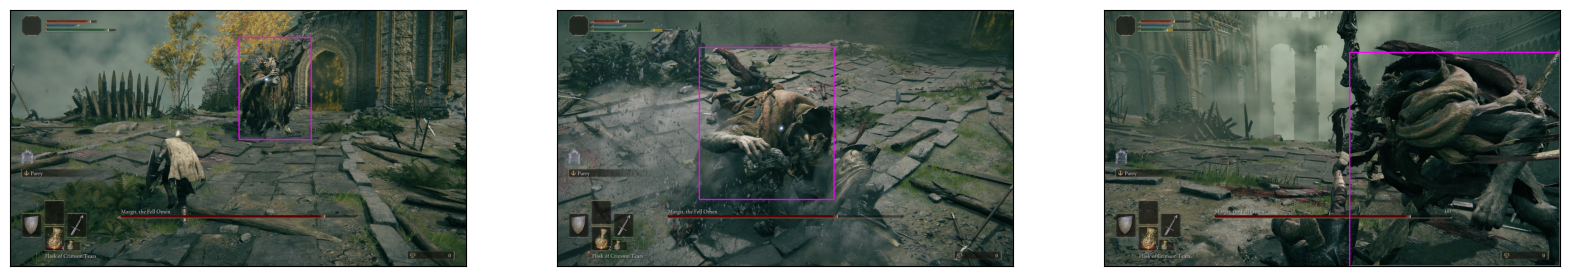

In [29]:
# designated image for display with bbox pair; still file names
img1 = img_bbox_list[7]
img2 = img_bbox_list[350]
img3 = img_bbox_list[1]

# returns images in proper form to display
img1 = img_for_display(img1)
img2 = img_for_display(img2)
img3 = img_for_display(img3)

# Shows images
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
plt.imshow(img1)
plt.xticks([])
plt.yticks([])
plt.subplot(1,3,2)
plt.imshow(img2)
plt.xticks([])
plt.yticks([])
plt.subplot(1,3,3)
plt.imshow(img3)
plt.xticks([])
plt.yticks([])

# Boss Detection

454 images were taken and split between train and test sets. Some train and validation images are displayed below.

In [30]:
TRAIN_PATH = MARGIT_PATH + "train/"
VALIDATION_PATH = MARGIT_PATH + "valid/"

In [31]:
TRAIN_IMAGES_PATH = TRAIN_PATH + "images"
TRAIN_LABELS_PATH = TRAIN_PATH + "labels"

In [32]:
VALIDATION_IMAGES_PATH = VALIDATION_PATH + "images"
VALIDATION_LABELS_PATH = VALIDATION_PATH + "labels"

## Train Images

The top image in each picture includes the true bounding box which I drew on the image. The bottom image will include the predicted bounding box in green, but will maintain the purple bounding box, which represents the true box.

In [145]:
# Keeps code clean for eventual translation to pdf
import warnings
warnings.filterwarnings("ignore")

In [146]:
# Uses model to predict bbox from image
from src.EldenRing.boss_detection.inference import BossDetectionReturn

In [216]:
# Get resized image dimensions for scaling purposes in the display
from src.EldenRing.boss_detection.config import RESIZE_WIDTH, RESIZE_HEIGHT

In [355]:
# creates list of train image files
train_images = [f for f in os.listdir(TRAIN_IMAGES_PATH) if os.path.isfile(os.path.join(TRAIN_IMAGES_PATH, f))]
train_image_paths = [os.path.join(TRAIN_IMAGES_PATH, f).replace("\\","/") for f in train_images]

In [356]:
# Grab image and labels
img1_path = train_image_paths[0]
img1_true = image2label_path(img1_path, TRAIN_LABELS_PATH)
img2_path = train_image_paths[205]
img2_true = image2label_path(img2_path, TRAIN_LABELS_PATH)
img3_path = train_image_paths[361]
img3_true = image2label_path(img3_path, TRAIN_LABELS_PATH)

In [357]:
# retrieve model
detection_model = BossDetectionReturn("../resources/EldenRing/BossImages/margityolo/outputs/model100.pth")

In [358]:
# convert image_path to image
img1 = cv2.cvtColor(cv2.imread(img1_path,-1), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread(img2_path,-1), cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(cv2.imread(img3_path,-1), cv2.COLOR_BGR2RGB)

In [359]:
# run image through the model
img1_resized, img1_pred = detection_model.boss_detection(img1)
img2_resized, img2_pred = detection_model.boss_detection(img2)
img3_resized, img3_pred = detection_model.boss_detection(img3)

In [360]:
# This will handle image outputs for display
def pred_boxes(pred_img, pred_output):
    # output is a list
    outputs = pred_output[0]
    boxes = outputs['boxes']
    # resize the image
    image_scale_width = image_width / RESIZE_WIDTH
    image_scale_height = image_height / RESIZE_HEIGHT
    for i in range(len(boxes)):
        # grabs box dimensions and associated score
        box = [dim for dim in boxes[i]]
        score = outputs['scores'][i].item()
        # Limit length of score displayed
        score = str(score)[:5] if len(str(score)) > 5 else str(score)
        # Skips if no boss is found
        if len(box) < 1:
            continue
        # Grab bbox dimensions
        l = int(box[0] * image_scale_width)
        t = int(box[1] * image_scale_height)
        r = int(box[2] * image_scale_width)
        b = int(box[3] * image_scale_height)
        # BBox on image
        cv2.rectangle(pred_img, (l, t), (r, b), (0, 255, 0), 3)
        # Display confidence score
        cv2.putText(pred_img, str(score),
                        (l, b), cv2.FONT_HERSHEY_SIMPLEX, 4.0, (0, 255, 0),
                        2, lineType=cv2.LINE_AA)
    return pred_img

In [361]:
# Returns the image with predicted bbox
pred1_img = pred_boxes(img1.copy(), img1_pred)
pred2_img = pred_boxes(img2.copy(), img2_pred)
pred3_img = pred_boxes(img3.copy(), img3_pred)

In [362]:
# Put bounding box on image
img1 = img_for_display((img1_path, img1_true))
img2 = img_for_display((img2_path, img2_true))
img3 = img_for_display((img3_path, img3_true))

Text(0.5, 1.0, 'Image 3: Prediction')

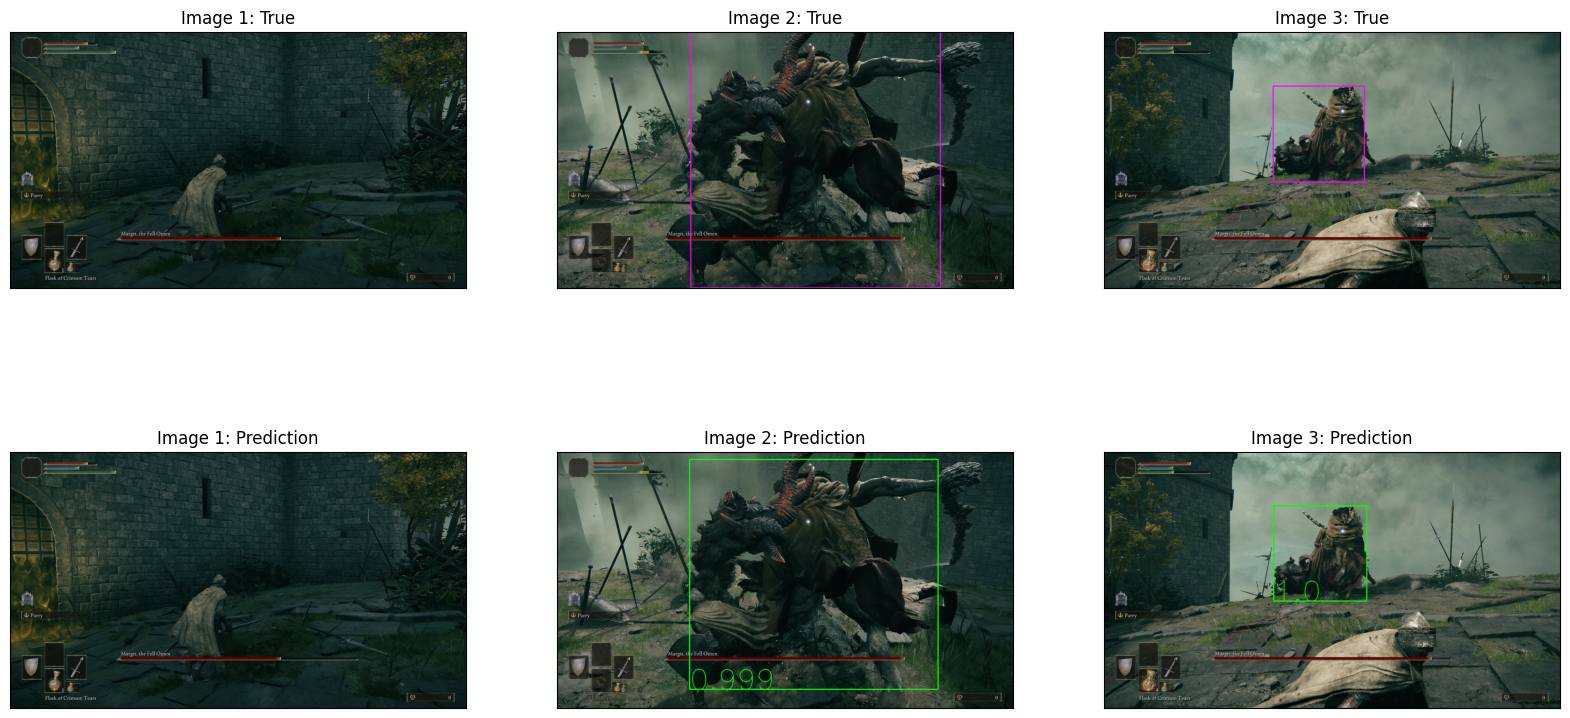

In [363]:
# Shows images
plt.figure(figsize=(20,10))
# Top row is true image bboxes
plt.subplot(2,3,1)
plt.imshow(img1)
plt.xticks([])
plt.yticks([])
plt.title("Image 1: True")
plt.subplot(2,3,2)
plt.imshow(img2)
plt.xticks([])
plt.yticks([])
plt.title("Image 2: True")
plt.subplot(2,3,3)
plt.imshow(img3)
plt.xticks([])
plt.yticks([])
plt.title("Image 3: True")
# Bottom row is predicted bboxes
plt.subplot(2,3,4)
plt.imshow(pred1_img)
plt.xticks([])
plt.yticks([])
plt.title("Image 1: Prediction")
plt.subplot(2,3,5)
plt.imshow(pred2_img)
plt.xticks([])
plt.yticks([])
plt.title("Image 2: Prediction")
plt.subplot(2,3,6)
plt.imshow(pred3_img)
plt.xticks([])
plt.yticks([])
plt.title("Image 3: Prediction")

## Validation Images

In [364]:
# creates list of train image files
validation_images = [f for f in os.listdir(VALIDATION_IMAGES_PATH) if os.path.isfile(os.path.join(VALIDATION_IMAGES_PATH, f))]
validation_image_paths = [os.path.join(VALIDATION_IMAGES_PATH, f).replace("\\","/") for f in validation_images]

In [365]:
# Grab image and labels
img1_path = validation_image_paths[0]
img1_true = image2label_path(img1_path, VALIDATION_LABELS_PATH)
img2_path = validation_image_paths[42]
img2_true = image2label_path(img2_path, VALIDATION_LABELS_PATH)
img3_path = validation_image_paths[90]
img3_true = image2label_path(img3_path, VALIDATION_LABELS_PATH)

In [366]:
# convert image_path to image
img1 = cv2.cvtColor(cv2.imread(img1_path,-1), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread(img2_path,-1), cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(cv2.imread(img3_path,-1), cv2.COLOR_BGR2RGB)

In [367]:
# run image through the model
img1_resized, img1_pred = detection_model.boss_detection(img1)
img2_resized, img2_pred = detection_model.boss_detection(img2)
img3_resized, img3_pred = detection_model.boss_detection(img3)

In [368]:
# Returns the image with predicted bbox
pred1_img = pred_boxes(img1.copy(), img1_pred)
pred2_img = pred_boxes(img2.copy(), img2_pred)
pred3_img = pred_boxes(img3.copy(), img3_pred)

In [369]:
# Put bounding box on image
img1 = img_for_display((img1_path, img1_true))
img2 = img_for_display((img2_path, img2_true))
img3 = img_for_display((img3_path, img3_true))

Text(0.5, 1.0, 'Image 3: Prediction')

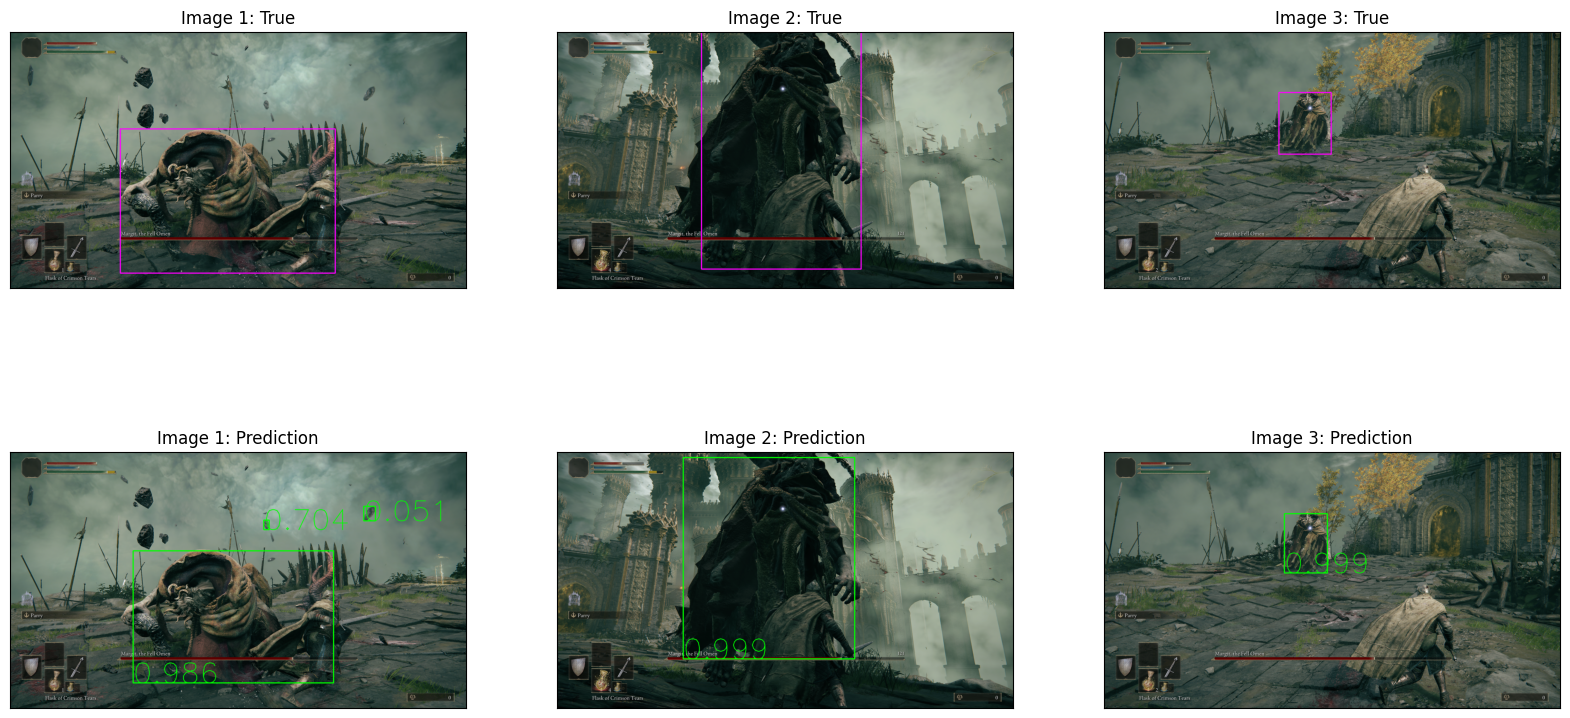

In [370]:
# Shows images
plt.figure(figsize=(20,10))
# Top row is true image bboxes
plt.subplot(2,3,1)
plt.imshow(img1)
plt.xticks([])
plt.yticks([])
plt.title("Image 1: True")
plt.subplot(2,3,2)
plt.imshow(img2)
plt.xticks([])
plt.yticks([])
plt.title("Image 2: True")
plt.subplot(2,3,3)
plt.imshow(img3)
plt.xticks([])
plt.yticks([])
plt.title("Image 3: True")
# Predictions
plt.subplot(2,3,4)
plt.imshow(pred1_img)
plt.xticks([])
plt.yticks([])
# Bottom row is predicted bboxes
plt.title("Image 1: Prediction")
plt.subplot(2,3,5)
plt.imshow(pred2_img)
plt.xticks([])
plt.yticks([])
plt.title("Image 2: Prediction")
plt.subplot(2,3,6)
plt.imshow(pred3_img)
plt.xticks([])
plt.yticks([])
plt.title("Image 3: Prediction")

This model is able to accurately determine bosses, but it struggles with debris. However, by setting a good confidence interval, one could make sure to better find the boss. Even in the images above, where the boxes are tighter or loser than the true bounding boxes, the model is only thrown off by the cloak of the boss, or where the extremities are hard to see as a result of them being broken up by the player-character, the environment, or the HUD elements on screen.